In [1]:
%store -r player_stats_shoot_salary_temp
%store -r kings_final_df

In [2]:
import pandas as pd

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
kings_final_df

,Name,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,Salary
0,De'Aaron Fox,8.9,17.0,52.6,1.9,4.9,39.4,4.2,5.1,82.3,7.0,12.1,58.1,1.412,0.58,19,19.0,31.8,24.0,0.5,4.4,4.9,6.0,1.1,0.5,2.6,2.7,2.3,"$28,103,550"
1,Domantas Sabonis,6.1,10.4,58.5,0.4,1.2,29.2,4.2,5.7,74.3,5.7,9.2,62.3,1.609,0.60,20,20.0,32.2,16.7,2.2,8.9,11.0,6.4,0.8,0.5,2.6,3.8,2.5,"$18,500,000"
2,Kevin Huerter,5.6,11.4,48.9,3.2,7.1,45.1,1.6,2.4,68.1,2.4,4.3,55.3,1.401,0.63,20,20.0,32.0,15.9,0.4,3.0,3.4,3.2,1.1,0.5,1.6,2.4,2.1,"$14,508,929"
3,Malik Monk,5.3,10.8,48.8,2.0,5.6,36.0,2.1,2.3,89.1,3.3,5.2,62.5,1.353,0.58,20,0.0,22.5,14.6,0.4,1.8,2.2,4.4,0.7,0.2,1.9,1.8,2.3,"$9,472,219"
4,Harrison Barnes,4.0,8.4,47.6,0.9,3.2,28.1,4.3,5.0,86.9,3.1,5.2,59.6,1.571,0.53,20,20.0,30.5,13.2,1.1,4.4,5.5,2.0,0.9,0.2,1.2,1.5,1.7,"$18,352,273"
5,Keegan Murray,3.9,9.8,39.8,1.8,5.6,31.7,1.1,1.2,86.4,2.1,4.2,50.7,1.085,0.49,18,16.0,28.6,10.6,0.9,3.1,3.9,0.9,0.7,0.6,1.7,2.1,0.6,"$8,008,440"
6,Terence Davis,2.5,5.6,44.9,1.5,3.6,40.6,0.7,0.8,87.5,1.1,2.0,52.6,1.290,0.58,19,1.0,13.3,7.3,0.4,2.6,3.0,1.4,0.7,0.2,0.7,1.8,1.9,"$4,000,000"
7,Davion Mitchell,2.7,5.9,46.2,0.9,2.7,34.0,0.4,0.6,72.7,1.8,3.2,56.3,1.145,0.54,20,1.0,19.1,6.7,0.1,1.2,1.3,2.1,0.5,0.2,1.1,1.5,2.0,"$4,833,600"
8,Trey Lyles,2.2,5.3,41.2,1.3,3.8,35.0,1.0,1.4,72.7,0.9,1.6,56.0,1.259,0.54,16,0.0,14.7,6.7,1.1,1.8,2.8,0.8,0.4,0.4,1.1,1.1,0.7,"$2,700,000"
9,Chimezie Metu,2.3,4.0,57.8,0.2,1.0,18.8,0.6,0.7,90.9,2.1,3.0,70.8,1.359,0.60,16,0.0,12.5,5.4,0.7,2.6,3.3,0.7,0.3,0.2,0.6,1.1,1.1,"$1,910,680"


In [5]:
import plotnine as p9
import numpy as np
import statsmodels.api as sm 
import pandas as pd
import re
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

### DATA CLEANING

In [6]:
df = player_stats_shoot_salary_temp
df_names = df["Name"]
df

,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,Salary
0,Nikola Jokic,19,19.00000,31.90000,22.70000,1.80000,7.90000,9.80000,8.90000,1.30000,0.60000,3.20000,2.90000,2.80000,8.50000,13.40000,63.10000,0.80000,2.30000,34.90000,5.00000,6.10000,82.60000,7.70000,11.20000,68.90000,1.69400,0.66000,33047804.00000
1,Jamal Murray,18,18.00000,29.70000,17.90000,0.60000,3.20000,3.70000,4.90000,1.00000,0.20000,1.90000,1.20000,2.50000,6.90000,15.40000,44.80000,1.90000,5.10000,38.00000,2.20000,2.80000,78.40000,4.90000,10.30000,48.10000,1.16600,0.51000,31650000.00000
3,Aaron Gordon,19,19.00000,28.80000,15.90000,2.40000,4.20000,6.60000,2.40000,0.70000,0.90000,1.40000,1.70000,1.70000,6.20000,10.20000,60.30000,1.10000,2.80000,37.70000,2.60000,4.20000,61.30000,5.10000,7.40000,68.80000,1.56200,0.65000,19690909.00000
4,Bones Hyland,14,0.00000,21.60000,15.10000,0.30000,1.80000,2.10000,3.50000,0.60000,0.30000,1.90000,1.70000,1.80000,4.90000,12.20000,40.40000,2.90000,6.40000,44.40000,2.40000,2.90000,82.50000,2.10000,5.80000,35.80000,1.23400,0.52000,2201520.00000
5,Kentavious Caldwell-Pope,21,21.00000,31.20000,11.20000,0.50000,2.50000,3.00000,2.10000,1.20000,0.40000,1.20000,1.90000,1.70000,4.00000,8.40000,46.90000,2.20000,4.60000,47.90000,1.10000,1.40000,76.70000,1.80000,3.90000,45.70000,1.32800,0.60000,14004703.00000
6,Bruce Brown,22,10.00000,29.70000,11.10000,1.00000,3.40000,4.40000,4.60000,1.10000,0.50000,1.80000,2.40000,2.60000,4.40000,9.50000,46.40000,1.40000,3.40000,40.00000,1.00000,1.10000,87.50000,3.00000,6.10000,50.00000,1.17200,0.54000,6479000.00000
7,Jeff Green,16,3.00000,19.90000,7.90000,0.80000,1.80000,2.60000,1.20000,0.40000,0.20000,1.00000,2.10000,1.20000,2.90000,5.60000,52.80000,0.30000,1.30000,25.00000,1.80000,2.30000,77.80000,2.60000,4.30000,60.90000,1.42700,0.56000,4500000.00000
8,Vlatko Cancar,14,0.00000,12.60000,5.70000,0.20000,1.40000,1.60000,0.90000,0.40000,0.30000,0.60000,1.40000,1.60000,2.10000,4.30000,50.00000,1.00000,2.20000,45.20000,0.40000,0.50000,85.70000,1.10000,2.10000,55.20000,1.33300,0.62000,2234359.00000
9,DeAndre Jordan,18,3.00000,16.10000,5.30000,1.70000,4.40000,6.10000,1.10000,0.20000,0.70000,1.30000,1.70000,0.80000,2.30000,3.10000,74.50000,0.10000,0.10000,100.00000,0.70000,1.60000,46.40000,2.20000,3.00000,74.10000,1.74500,0.75000,1836090.00000
10,Zeke Nnaji,16,0.00000,10.30000,4.70000,1.00000,0.40000,1.40000,0.10000,0.20000,0.10000,0.50000,1.60000,0.30000,2.00000,3.40000,59.30000,0.20000,0.80000,23.10000,0.50000,0.60000,80.00000,1.80000,2.60000,70.70000,1.38900,0.62000,2498760.00000


In [7]:
kings_df = kings_final_df
kings_df

,Name,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,Salary
0,De'Aaron Fox,8.90000,17.00000,52.60000,1.90000,4.90000,39.40000,4.20000,5.10000,82.30000,7.00000,12.10000,58.10000,1.41200,0.58000,19,19.00000,31.80000,24.00000,0.50000,4.40000,4.90000,6.00000,1.10000,0.50000,2.60000,2.70000,2.30000,"$28,103,550"
1,Domantas Sabonis,6.10000,10.40000,58.50000,0.40000,1.20000,29.20000,4.20000,5.70000,74.30000,5.70000,9.20000,62.30000,1.60900,0.60000,20,20.00000,32.20000,16.70000,2.20000,8.90000,11.00000,6.40000,0.80000,0.50000,2.60000,3.80000,2.50000,"$18,500,000"
2,Kevin Huerter,5.60000,11.40000,48.90000,3.20000,7.10000,45.10000,1.60000,2.40000,68.10000,2.40000,4.30000,55.30000,1.40100,0.63000,20,20.00000,32.00000,15.90000,0.40000,3.00000,3.40000,3.20000,1.10000,0.50000,1.60000,2.40000,2.10000,"$14,508,929"
3,Malik Monk,5.30000,10.80000,48.80000,2.00000,5.60000,36.00000,2.10000,2.30000,89.10000,3.30000,5.20000,62.50000,1.35300,0.58000,20,0.00000,22.50000,14.60000,0.40000,1.80000,2.20000,4.40000,0.70000,0.20000,1.90000,1.80000,2.30000,"$9,472,219"
4,Harrison Barnes,4.00000,8.40000,47.60000,0.90000,3.20000,28.10000,4.30000,5.00000,86.90000,3.10000,5.20000,59.60000,1.57100,0.53000,20,20.00000,30.50000,13.20000,1.10000,4.40000,5.50000,2.00000,0.90000,0.20000,1.20000,1.50000,1.70000,"$18,352,273"
5,Keegan Murray,3.90000,9.80000,39.80000,1.80000,5.60000,31.70000,1.10000,1.20000,86.40000,2.10000,4.20000,50.70000,1.08500,0.49000,18,16.00000,28.60000,10.60000,0.90000,3.10000,3.90000,0.90000,0.70000,0.60000,1.70000,2.10000,0.60000,"$8,008,440"
6,Terence Davis,2.50000,5.60000,44.90000,1.50000,3.60000,40.60000,0.70000,0.80000,87.50000,1.10000,2.00000,52.60000,1.29000,0.58000,19,1.00000,13.30000,7.30000,0.40000,2.60000,3.00000,1.40000,0.70000,0.20000,0.70000,1.80000,1.90000,"$4,000,000"
7,Davion Mitchell,2.70000,5.90000,46.20000,0.90000,2.70000,34.00000,0.40000,0.60000,72.70000,1.80000,3.20000,56.30000,1.14500,0.54000,20,1.00000,19.10000,6.70000,0.10000,1.20000,1.30000,2.10000,0.50000,0.20000,1.10000,1.50000,2.00000,"$4,833,600"
8,Trey Lyles,2.20000,5.30000,41.20000,1.30000,3.80000,35.00000,1.00000,1.40000,72.70000,0.90000,1.60000,56.00000,1.25900,0.54000,16,0.00000,14.70000,6.70000,1.10000,1.80000,2.80000,0.80000,0.40000,0.40000,1.10000,1.10000,0.70000,"$2,700,000"
9,Chimezie Metu,2.30000,4.00000,57.80000,0.20000,1.00000,18.80000,0.60000,0.70000,90.90000,2.10000,3.00000,70.80000,1.35900,0.60000,16,0.00000,12.50000,5.40000,0.70000,2.60000,3.30000,0.70000,0.30000,0.20000,0.60000,1.10000,1.10000,"$1,910,680"


In [8]:
def df_clean(df):
    df = df.drop("Name", axis = "columns").dropna()
    drop_df = df[df["AST/TO"].isin([np.inf, -np.inf])]
    df = df.drop(drop_df.index)
    for name in df.columns:
        if name in ["FGM","FGA","3PM","3PA","2PM","2PA","FTM","FTA"]:
            df = df.drop(name, axis = "columns") 
    return df


In [9]:
df = df_clean(df)

In [10]:
for name in df.columns:

    if name in ["FGM","FGA","3PM","3PA","2PM","2PA","FTM","FTA"]:
        df = df.drop(name, axis = "columns")
    
df

,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,FG%,3P%,FT%,2P%,SC-EFF,SH-EFF,Salary
0,19,19.00000,31.90000,22.70000,1.80000,7.90000,9.80000,8.90000,1.30000,0.60000,3.20000,2.90000,2.80000,63.10000,34.90000,82.60000,68.90000,1.69400,0.66000,33047804.00000
1,18,18.00000,29.70000,17.90000,0.60000,3.20000,3.70000,4.90000,1.00000,0.20000,1.90000,1.20000,2.50000,44.80000,38.00000,78.40000,48.10000,1.16600,0.51000,31650000.00000
3,19,19.00000,28.80000,15.90000,2.40000,4.20000,6.60000,2.40000,0.70000,0.90000,1.40000,1.70000,1.70000,60.30000,37.70000,61.30000,68.80000,1.56200,0.65000,19690909.00000
4,14,0.00000,21.60000,15.10000,0.30000,1.80000,2.10000,3.50000,0.60000,0.30000,1.90000,1.70000,1.80000,40.40000,44.40000,82.50000,35.80000,1.23400,0.52000,2201520.00000
5,21,21.00000,31.20000,11.20000,0.50000,2.50000,3.00000,2.10000,1.20000,0.40000,1.20000,1.90000,1.70000,46.90000,47.90000,76.70000,45.70000,1.32800,0.60000,14004703.00000
6,22,10.00000,29.70000,11.10000,1.00000,3.40000,4.40000,4.60000,1.10000,0.50000,1.80000,2.40000,2.60000,46.40000,40.00000,87.50000,50.00000,1.17200,0.54000,6479000.00000
7,16,3.00000,19.90000,7.90000,0.80000,1.80000,2.60000,1.20000,0.40000,0.20000,1.00000,2.10000,1.20000,52.80000,25.00000,77.80000,60.90000,1.42700,0.56000,4500000.00000
8,14,0.00000,12.60000,5.70000,0.20000,1.40000,1.60000,0.90000,0.40000,0.30000,0.60000,1.40000,1.60000,50.00000,45.20000,85.70000,55.20000,1.33300,0.62000,2234359.00000
9,18,3.00000,16.10000,5.30000,1.70000,4.40000,6.10000,1.10000,0.20000,0.70000,1.30000,1.70000,0.80000,74.50000,100.00000,46.40000,74.10000,1.74500,0.75000,1836090.00000
10,16,0.00000,10.30000,4.70000,1.00000,0.40000,1.40000,0.10000,0.20000,0.10000,0.50000,1.60000,0.30000,59.30000,23.10000,80.00000,70.70000,1.38900,0.62000,2498760.00000


### MODEL BUILDING

In [11]:
df = sm.add_constant(df)

In [12]:
ols = sm.OLS(np.log(df['Salary']),df.drop(columns = 'Salary')) 
ols_res = ols.fit() 

In [13]:
ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     8.571
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           2.38e-16
Time:                        21:14:37   Log-Likelihood:                -234.54
No. Observations:                 182   AIC:                             509.1
Df Residuals:                     162   BIC:                             573.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.3195      0.455     31.494      0.000      13.422      15.217
GP            -0.0118      0.017     -0.673      0.502      -0.046       0.023
GS             0.0087      0.015      0.566      0.572      -0.022       0.039
MIN            0.0540      0.026      2.090      0.038       0.003       0.105
PTS            0.0132      0.025      0.526      0.600      -0.036       0.063
OR             1.4576      1.582      0.921      0.358      -1.667       4.583
DR             1.7609      1.600      1.101      0.273      -1.399       4.920
REB           -1.6002      1.584     -1.010      0.314      -4.728       1.527
AST            0.1071      0.108      0.994      0.322      -0.106       0.320
STL           -0.1600      0.295     -0.542      0.588      -0.743       0.423
BLK            0.0764      0.249      0.307      0.759      -0.415       0.568
TO             0.0332      0.248      0.134      0.894      -0.456       0.522
PF            -0.0275      0.138     -0.199      0.842      -0.300       0.245
AST/TO        -0.0870      0.115     -0.757      0.450      -0.314       0.140
FG%           -0.0435      0.029     -1.478      0.141      -0.102       0.015
3P%           -0.0076      0.007     -1.064      0.289      -0.022       0.006
FT%           -0.0022      0.005     -0.438      0.662      -0.012       0.008
2P%            0.0234      0.009      2.604      0.010       0.006       0.041
SC-EFF        -0.5166      0.685     -0.754      0.452      -1.870       0.837
SH-EFF         2.8394      2.708      1.048      0.296      -2.509       8.188
==============================================================================
Omnibus:                       69.943   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              384.600
Skew:                          -1.321   Prob(JB):                     3.06e-84
Kurtosis:                       9.613   Cond. No.                     4.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
df = df.drop("OR", axis = "columns")

In [15]:
df = df.drop("STL", axis = "columns")

In [16]:
df = df.drop("PF", axis = "columns")

In [17]:
df = df.drop("TO", axis = "columns")

In [18]:
df = df.drop("BLK", axis = "columns") #.473

In [19]:
df = df.drop("FG%", axis = "columns")

In [20]:
df = df.drop("AST/TO", axis = "columns")

In [21]:
df = df.drop("SH-EFF", axis = "columns")

In [22]:
df = df.drop("GS", axis = "columns") #.482

In [23]:
df = df.drop("REB", axis = "columns") 

In [24]:
df = df.drop("3P%", axis = "columns")

In [25]:
#df = df.drop("SC-EFF", axis = "columns")

### REMOVING OUTLIERS

In [26]:
#ols_res.resid_pearson[ols_res.resid_pearson < -5]

In [27]:
#ols_res.predict()[ols_res.resid_pearson < -4]

In [28]:
#df["Residuals"] = ols_res.resid_pearson

In [29]:

#temp_df = df[round(df["Residuals"]) < -4]
#df = df.drop(temp_df.index)

In [30]:
#temp_df

In [31]:
#df = df.drop("Residuals", axis = "columns")

### MODEL SELECTION

In [32]:
#df = df.drop("MIN", axis = "columns")

In [33]:
#df = df.drop("SC-EFF", axis = "columns")

In [34]:
#df = df.drop("BLK", axis = "columns")

In [35]:
#df = df.drop("GS", axis = "columns")

In [36]:
#df = df.drop("2P%", axis = "columns")

In [37]:
#df = df.drop("FT%", axis = "columns")

In [38]:
#df = df.drop("TO", axis = "columns")

In [39]:
#df = df.drop("AST/TO", axis = "columns")

In [40]:
#df = df.drop("PF", axis = "columns")

In [41]:
#df = df.drop("PER", axis = "columns")

In [42]:
#df = df.drop("SH-EFF", axis = "columns")

In [43]:
#df = df.drop("3P%", axis = "columns") #adj R squared max

In [44]:
ols = sm.OLS(np.log(df['Salary']),df.drop(columns = 'Salary')) 
ols_res = ols.fit() 
ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     19.65
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           6.74e-21
Time:                        21:14:38   Log-Likelihood:                -239.03
No. Observations:                 182   AIC:                             496.1
Df Residuals:                     173   BIC:                             524.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.1662      0.394     35.971      0.000      13.389      14.943
GP            -0.0112      0.016     -0.686      0.494      -0.043       0.021
MIN            0.0480      0.019      2.584      0.011       0.011       0.085
PTS            0.0326      0.020      1.594      0.113      -0.008       0.073
DR             0.1038      0.059      1.763      0.080      -0.012       0.220
AST            0.0638      0.053      1.195      0.234      -0.042       0.169
FT%            0.0009      0.004      0.199      0.843      -0.008       0.009
2P%            0.0174      0.008      2.306      0.022       0.003       0.032
SC-EFF        -0.9929      0.393     -2.528      0.012      -1.768      -0.218
==============================================================================
Omnibus:                       69.995   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              387.910
Skew:                          -1.320   Prob(JB):                     5.84e-85
Kurtosis:                       9.647   Cond. No.                         620.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#ols_res.predict(kings_df.drop(columns = 'Salary'))

### DIAGNOSTIC PLOTS

/home/mattmori/anaconda3/lib/python3.9/site-packages/plotnine/stats/smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


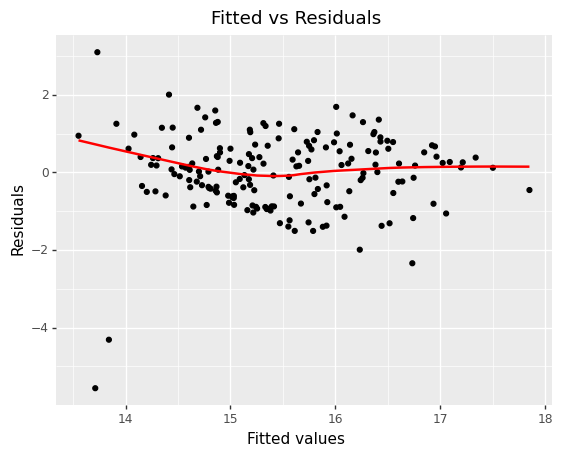

<ggplot: (8749957125991)>

In [46]:
(
    p9.ggplot(mapping = p9.aes(x = 'ols_res.fittedvalues', 
                                            y = "ols_res.resid_pearson"))
    + p9.geom_point()
    + p9.geom_smooth(color = "red")
    + p9.labs(title = "Fitted vs Residuals", x = 'Fitted values', y = 'Residuals')
)

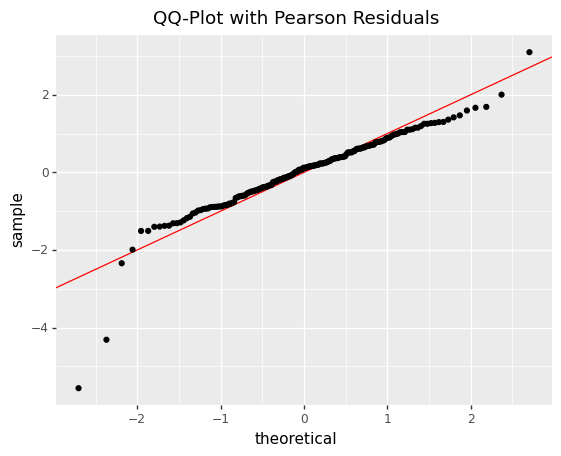

<ggplot: (8749947513369)>

In [47]:
(
    p9.ggplot(mapping = p9.aes(sample = "ols_res.resid_pearson"))
    + p9.geom_abline(p9.aes(intercept = 0, slope = 1), color = 'red')
    + p9.stats.stat_qq()
    + p9.labs(title = "QQ-Plot with Pearson Residuals")
)

In [48]:
df["Residuals"] = ols_res.resid_pearson
temp_df2 = df[round(df["Residuals"]) < -2]
temp_df2

,const,GP,MIN,PTS,DR,AST,FT%,2P%,SC-EFF,Salary,Residuals
108,1.00000,15,5.50000,3.80000,1.30000,0.10000,48.60000,66.70000,1.90000,19186.00000,-4.31207
138,1.00000,7,11.90000,3.70000,0.90000,0.70000,100.00000,0.00000,1.30000,5318.00000,-5.56157


In [49]:
df = df.drop(temp_df2.index)
df = df.drop("Residuals", axis = "columns")

In [50]:
ols = sm.OLS(np.log(df['Salary']),df.drop(columns = 'Salary')) 
ols_res = ols.fit() 
ols_res.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     24.05
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           1.74e-24
Time:                        21:14:38   Log-Likelihood:                -197.79
No. Observations:                 180   AIC:                             413.6
Df Residuals:                     171   BIC:                             442.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.3806      0.320     44.968      0.000      13.749      15.012
GP            -0.0164      0.013     -1.234      0.219      -0.043       0.010
MIN            0.0440      0.015      2.917      0.004       0.014       0.074
PTS            0.0274      0.017      1.656      0.100      -0.005       0.060
DR             0.1017      0.048      2.134      0.034       0.008       0.196
AST            0.0589      0.043      1.365      0.174      -0.026       0.144
FT%           -0.0005      0.003     -0.134      0.894      -0.007       0.006
2P%           -0.0076      0.007     -1.141      0.256      -0.021       0.006
SC-EFF         0.1977      0.340      0.582      0.561      -0.473       0.869
==============================================================================
Omnibus:                        2.046   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.360   Jarque-Bera (JB):                2.101
Skew:                          -0.249   Prob(JB):                        0.350
Kurtosis:                       2.819   Cond. No.                         632.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/home/mattmori/anaconda3/lib/python3.9/site-packages/plotnine/stats/smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


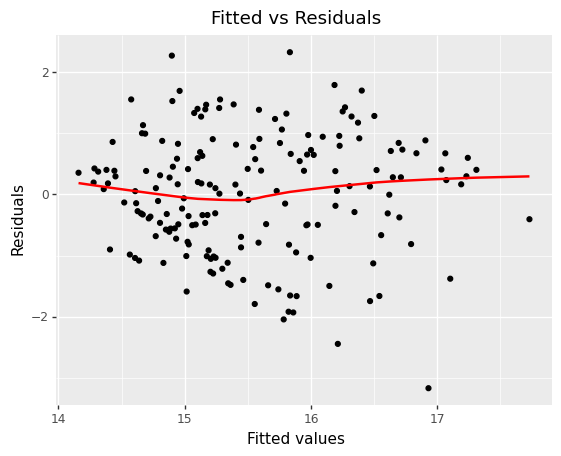

<ggplot: (8749947464608)>

In [51]:
(
    p9.ggplot(mapping = p9.aes(x = 'ols_res.fittedvalues', 
                                            y = "ols_res.resid_pearson"))
    + p9.geom_point()
    + p9.geom_smooth(color = "red")
    + p9.labs(title = "Fitted vs Residuals", x = 'Fitted values', y = 'Residuals')
)

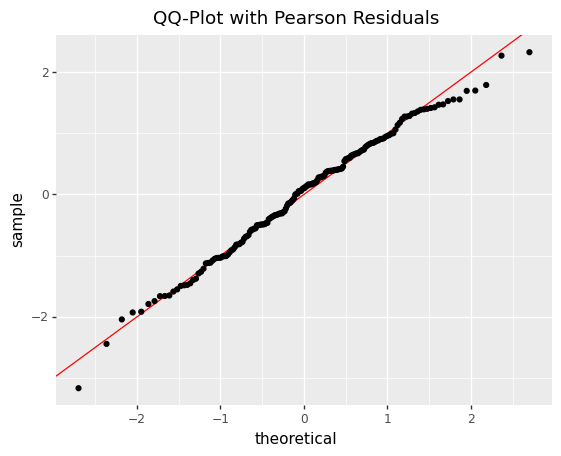

<ggplot: (8749947436093)>

In [52]:
(
    p9.ggplot(mapping = p9.aes(sample = "ols_res.resid_pearson"))
    + p9.geom_abline(p9.aes(intercept = 0, slope = 1), color = 'red')
    + p9.stats.stat_qq()
    + p9.labs(title = "QQ-Plot with Pearson Residuals")
)

### KINGS

In [53]:
kings_df

,Name,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,Salary
0,De'Aaron Fox,8.90000,17.00000,52.60000,1.90000,4.90000,39.40000,4.20000,5.10000,82.30000,7.00000,12.10000,58.10000,1.41200,0.58000,19,19.00000,31.80000,24.00000,0.50000,4.40000,4.90000,6.00000,1.10000,0.50000,2.60000,2.70000,2.30000,"$28,103,550"
1,Domantas Sabonis,6.10000,10.40000,58.50000,0.40000,1.20000,29.20000,4.20000,5.70000,74.30000,5.70000,9.20000,62.30000,1.60900,0.60000,20,20.00000,32.20000,16.70000,2.20000,8.90000,11.00000,6.40000,0.80000,0.50000,2.60000,3.80000,2.50000,"$18,500,000"
2,Kevin Huerter,5.60000,11.40000,48.90000,3.20000,7.10000,45.10000,1.60000,2.40000,68.10000,2.40000,4.30000,55.30000,1.40100,0.63000,20,20.00000,32.00000,15.90000,0.40000,3.00000,3.40000,3.20000,1.10000,0.50000,1.60000,2.40000,2.10000,"$14,508,929"
3,Malik Monk,5.30000,10.80000,48.80000,2.00000,5.60000,36.00000,2.10000,2.30000,89.10000,3.30000,5.20000,62.50000,1.35300,0.58000,20,0.00000,22.50000,14.60000,0.40000,1.80000,2.20000,4.40000,0.70000,0.20000,1.90000,1.80000,2.30000,"$9,472,219"
4,Harrison Barnes,4.00000,8.40000,47.60000,0.90000,3.20000,28.10000,4.30000,5.00000,86.90000,3.10000,5.20000,59.60000,1.57100,0.53000,20,20.00000,30.50000,13.20000,1.10000,4.40000,5.50000,2.00000,0.90000,0.20000,1.20000,1.50000,1.70000,"$18,352,273"
5,Keegan Murray,3.90000,9.80000,39.80000,1.80000,5.60000,31.70000,1.10000,1.20000,86.40000,2.10000,4.20000,50.70000,1.08500,0.49000,18,16.00000,28.60000,10.60000,0.90000,3.10000,3.90000,0.90000,0.70000,0.60000,1.70000,2.10000,0.60000,"$8,008,440"
6,Terence Davis,2.50000,5.60000,44.90000,1.50000,3.60000,40.60000,0.70000,0.80000,87.50000,1.10000,2.00000,52.60000,1.29000,0.58000,19,1.00000,13.30000,7.30000,0.40000,2.60000,3.00000,1.40000,0.70000,0.20000,0.70000,1.80000,1.90000,"$4,000,000"
7,Davion Mitchell,2.70000,5.90000,46.20000,0.90000,2.70000,34.00000,0.40000,0.60000,72.70000,1.80000,3.20000,56.30000,1.14500,0.54000,20,1.00000,19.10000,6.70000,0.10000,1.20000,1.30000,2.10000,0.50000,0.20000,1.10000,1.50000,2.00000,"$4,833,600"
8,Trey Lyles,2.20000,5.30000,41.20000,1.30000,3.80000,35.00000,1.00000,1.40000,72.70000,0.90000,1.60000,56.00000,1.25900,0.54000,16,0.00000,14.70000,6.70000,1.10000,1.80000,2.80000,0.80000,0.40000,0.40000,1.10000,1.10000,0.70000,"$2,700,000"
9,Chimezie Metu,2.30000,4.00000,57.80000,0.20000,1.00000,18.80000,0.60000,0.70000,90.90000,2.10000,3.00000,70.80000,1.35900,0.60000,16,0.00000,12.50000,5.40000,0.70000,2.60000,3.30000,0.70000,0.30000,0.20000,0.60000,1.10000,1.10000,"$1,910,680"


In [54]:
rearrange = kings_df.iloc[:,0:15]
rearrange_no_name = rearrange.iloc[:,1:]
rearrange

,Name,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF
0,De'Aaron Fox,8.90000,17.00000,52.60000,1.90000,4.90000,39.40000,4.20000,5.10000,82.30000,7.00000,12.10000,58.10000,1.41200,0.58000
1,Domantas Sabonis,6.10000,10.40000,58.50000,0.40000,1.20000,29.20000,4.20000,5.70000,74.30000,5.70000,9.20000,62.30000,1.60900,0.60000
2,Kevin Huerter,5.60000,11.40000,48.90000,3.20000,7.10000,45.10000,1.60000,2.40000,68.10000,2.40000,4.30000,55.30000,1.40100,0.63000
3,Malik Monk,5.30000,10.80000,48.80000,2.00000,5.60000,36.00000,2.10000,2.30000,89.10000,3.30000,5.20000,62.50000,1.35300,0.58000
4,Harrison Barnes,4.00000,8.40000,47.60000,0.90000,3.20000,28.10000,4.30000,5.00000,86.90000,3.10000,5.20000,59.60000,1.57100,0.53000
5,Keegan Murray,3.90000,9.80000,39.80000,1.80000,5.60000,31.70000,1.10000,1.20000,86.40000,2.10000,4.20000,50.70000,1.08500,0.49000
6,Terence Davis,2.50000,5.60000,44.90000,1.50000,3.60000,40.60000,0.70000,0.80000,87.50000,1.10000,2.00000,52.60000,1.29000,0.58000
7,Davion Mitchell,2.70000,5.90000,46.20000,0.90000,2.70000,34.00000,0.40000,0.60000,72.70000,1.80000,3.20000,56.30000,1.14500,0.54000
8,Trey Lyles,2.20000,5.30000,41.20000,1.30000,3.80000,35.00000,1.00000,1.40000,72.70000,0.90000,1.60000,56.00000,1.25900,0.54000
9,Chimezie Metu,2.30000,4.00000,57.80000,0.20000,1.00000,18.80000,0.60000,0.70000,90.90000,2.10000,3.00000,70.80000,1.35900,0.60000


In [55]:
kings_df = kings_df.drop(rearrange_no_name, axis = "columns")
kings_df

,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,Salary
0,De'Aaron Fox,19,19.00000,31.80000,24.00000,0.50000,4.40000,4.90000,6.00000,1.10000,0.50000,2.60000,2.70000,2.30000,"$28,103,550"
1,Domantas Sabonis,20,20.00000,32.20000,16.70000,2.20000,8.90000,11.00000,6.40000,0.80000,0.50000,2.60000,3.80000,2.50000,"$18,500,000"
2,Kevin Huerter,20,20.00000,32.00000,15.90000,0.40000,3.00000,3.40000,3.20000,1.10000,0.50000,1.60000,2.40000,2.10000,"$14,508,929"
3,Malik Monk,20,0.00000,22.50000,14.60000,0.40000,1.80000,2.20000,4.40000,0.70000,0.20000,1.90000,1.80000,2.30000,"$9,472,219"
4,Harrison Barnes,20,20.00000,30.50000,13.20000,1.10000,4.40000,5.50000,2.00000,0.90000,0.20000,1.20000,1.50000,1.70000,"$18,352,273"
5,Keegan Murray,18,16.00000,28.60000,10.60000,0.90000,3.10000,3.90000,0.90000,0.70000,0.60000,1.70000,2.10000,0.60000,"$8,008,440"
6,Terence Davis,19,1.00000,13.30000,7.30000,0.40000,2.60000,3.00000,1.40000,0.70000,0.20000,0.70000,1.80000,1.90000,"$4,000,000"
7,Davion Mitchell,20,1.00000,19.10000,6.70000,0.10000,1.20000,1.30000,2.10000,0.50000,0.20000,1.10000,1.50000,2.00000,"$4,833,600"
8,Trey Lyles,16,0.00000,14.70000,6.70000,1.10000,1.80000,2.80000,0.80000,0.40000,0.40000,1.10000,1.10000,0.70000,"$2,700,000"
9,Chimezie Metu,16,0.00000,12.50000,5.40000,0.70000,2.60000,3.30000,0.70000,0.30000,0.20000,0.60000,1.10000,1.10000,"$1,910,680"


In [56]:
kings_df = pd.merge(kings_df,rearrange, how = "left", on = "Name")
salary = kings_df.pop("Salary")
kings_df = pd.concat([kings_df, salary], axis = 'columns')

In [57]:
kings_df

,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,Salary
0,De'Aaron Fox,19,19.00000,31.80000,24.00000,0.50000,4.40000,4.90000,6.00000,1.10000,0.50000,2.60000,2.70000,2.30000,8.90000,17.00000,52.60000,1.90000,4.90000,39.40000,4.20000,5.10000,82.30000,7.00000,12.10000,58.10000,1.41200,0.58000,"$28,103,550"
1,Domantas Sabonis,20,20.00000,32.20000,16.70000,2.20000,8.90000,11.00000,6.40000,0.80000,0.50000,2.60000,3.80000,2.50000,6.10000,10.40000,58.50000,0.40000,1.20000,29.20000,4.20000,5.70000,74.30000,5.70000,9.20000,62.30000,1.60900,0.60000,"$18,500,000"
2,Kevin Huerter,20,20.00000,32.00000,15.90000,0.40000,3.00000,3.40000,3.20000,1.10000,0.50000,1.60000,2.40000,2.10000,5.60000,11.40000,48.90000,3.20000,7.10000,45.10000,1.60000,2.40000,68.10000,2.40000,4.30000,55.30000,1.40100,0.63000,"$14,508,929"
3,Malik Monk,20,0.00000,22.50000,14.60000,0.40000,1.80000,2.20000,4.40000,0.70000,0.20000,1.90000,1.80000,2.30000,5.30000,10.80000,48.80000,2.00000,5.60000,36.00000,2.10000,2.30000,89.10000,3.30000,5.20000,62.50000,1.35300,0.58000,"$9,472,219"
4,Harrison Barnes,20,20.00000,30.50000,13.20000,1.10000,4.40000,5.50000,2.00000,0.90000,0.20000,1.20000,1.50000,1.70000,4.00000,8.40000,47.60000,0.90000,3.20000,28.10000,4.30000,5.00000,86.90000,3.10000,5.20000,59.60000,1.57100,0.53000,"$18,352,273"
5,Keegan Murray,18,16.00000,28.60000,10.60000,0.90000,3.10000,3.90000,0.90000,0.70000,0.60000,1.70000,2.10000,0.60000,3.90000,9.80000,39.80000,1.80000,5.60000,31.70000,1.10000,1.20000,86.40000,2.10000,4.20000,50.70000,1.08500,0.49000,"$8,008,440"
6,Terence Davis,19,1.00000,13.30000,7.30000,0.40000,2.60000,3.00000,1.40000,0.70000,0.20000,0.70000,1.80000,1.90000,2.50000,5.60000,44.90000,1.50000,3.60000,40.60000,0.70000,0.80000,87.50000,1.10000,2.00000,52.60000,1.29000,0.58000,"$4,000,000"
7,Davion Mitchell,20,1.00000,19.10000,6.70000,0.10000,1.20000,1.30000,2.10000,0.50000,0.20000,1.10000,1.50000,2.00000,2.70000,5.90000,46.20000,0.90000,2.70000,34.00000,0.40000,0.60000,72.70000,1.80000,3.20000,56.30000,1.14500,0.54000,"$4,833,600"
8,Trey Lyles,16,0.00000,14.70000,6.70000,1.10000,1.80000,2.80000,0.80000,0.40000,0.40000,1.10000,1.10000,0.70000,2.20000,5.30000,41.20000,1.30000,3.80000,35.00000,1.00000,1.40000,72.70000,0.90000,1.60000,56.00000,1.25900,0.54000,"$2,700,000"
9,Chimezie Metu,16,0.00000,12.50000,5.40000,0.70000,2.60000,3.30000,0.70000,0.30000,0.20000,0.60000,1.10000,1.10000,2.30000,4.00000,57.80000,0.20000,1.00000,18.80000,0.60000,0.70000,90.90000,2.10000,3.00000,70.80000,1.35900,0.60000,"$1,910,680"


In [58]:
#replace all the "--" and NAN to 0

kings_df['Salary'] = kings_df['Salary'].replace("--", '0')
kings_df['Salary'] = kings_df['Salary'].replace(np.NaN, '0')
#remove $ and , signals
for i in range(0,len(kings_df)):
    kings_df['Salary'][i] = kings_df['Salary'][i].lstrip('$')
    kings_df['Salary'][i] = kings_df['Salary'][i].replace(',','')
    #turn Salary to numbers
    kings_df['Salary'][i] = int(kings_df['Salary'][i])
#replace all 0 to NAN
kings_df['Salary'] = kings_df['Salary'].replace(0, np.NaN)
#drop all NAN
kings_df = kings_df.dropna()

/tmp/ipykernel_648/1469477879.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_648/1469477879.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_648/1469477879.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [59]:
kings_names = kings_df["Name"]

In [60]:
kings_df

,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,Salary
0,De'Aaron Fox,19,19.00000,31.80000,24.00000,0.50000,4.40000,4.90000,6.00000,1.10000,0.50000,2.60000,2.70000,2.30000,8.90000,17.00000,52.60000,1.90000,4.90000,39.40000,4.20000,5.10000,82.30000,7.00000,12.10000,58.10000,1.41200,0.58000,28103550.00000
1,Domantas Sabonis,20,20.00000,32.20000,16.70000,2.20000,8.90000,11.00000,6.40000,0.80000,0.50000,2.60000,3.80000,2.50000,6.10000,10.40000,58.50000,0.40000,1.20000,29.20000,4.20000,5.70000,74.30000,5.70000,9.20000,62.30000,1.60900,0.60000,18500000.00000
2,Kevin Huerter,20,20.00000,32.00000,15.90000,0.40000,3.00000,3.40000,3.20000,1.10000,0.50000,1.60000,2.40000,2.10000,5.60000,11.40000,48.90000,3.20000,7.10000,45.10000,1.60000,2.40000,68.10000,2.40000,4.30000,55.30000,1.40100,0.63000,14508929.00000
3,Malik Monk,20,0.00000,22.50000,14.60000,0.40000,1.80000,2.20000,4.40000,0.70000,0.20000,1.90000,1.80000,2.30000,5.30000,10.80000,48.80000,2.00000,5.60000,36.00000,2.10000,2.30000,89.10000,3.30000,5.20000,62.50000,1.35300,0.58000,9472219.00000
4,Harrison Barnes,20,20.00000,30.50000,13.20000,1.10000,4.40000,5.50000,2.00000,0.90000,0.20000,1.20000,1.50000,1.70000,4.00000,8.40000,47.60000,0.90000,3.20000,28.10000,4.30000,5.00000,86.90000,3.10000,5.20000,59.60000,1.57100,0.53000,18352273.00000
5,Keegan Murray,18,16.00000,28.60000,10.60000,0.90000,3.10000,3.90000,0.90000,0.70000,0.60000,1.70000,2.10000,0.60000,3.90000,9.80000,39.80000,1.80000,5.60000,31.70000,1.10000,1.20000,86.40000,2.10000,4.20000,50.70000,1.08500,0.49000,8008440.00000
6,Terence Davis,19,1.00000,13.30000,7.30000,0.40000,2.60000,3.00000,1.40000,0.70000,0.20000,0.70000,1.80000,1.90000,2.50000,5.60000,44.90000,1.50000,3.60000,40.60000,0.70000,0.80000,87.50000,1.10000,2.00000,52.60000,1.29000,0.58000,4000000.00000
7,Davion Mitchell,20,1.00000,19.10000,6.70000,0.10000,1.20000,1.30000,2.10000,0.50000,0.20000,1.10000,1.50000,2.00000,2.70000,5.90000,46.20000,0.90000,2.70000,34.00000,0.40000,0.60000,72.70000,1.80000,3.20000,56.30000,1.14500,0.54000,4833600.00000
8,Trey Lyles,16,0.00000,14.70000,6.70000,1.10000,1.80000,2.80000,0.80000,0.40000,0.40000,1.10000,1.10000,0.70000,2.20000,5.30000,41.20000,1.30000,3.80000,35.00000,1.00000,1.40000,72.70000,0.90000,1.60000,56.00000,1.25900,0.54000,2700000.00000
9,Chimezie Metu,16,0.00000,12.50000,5.40000,0.70000,2.60000,3.30000,0.70000,0.30000,0.20000,0.60000,1.10000,1.10000,2.30000,4.00000,57.80000,0.20000,1.00000,18.80000,0.60000,0.70000,90.90000,2.10000,3.00000,70.80000,1.35900,0.60000,1910680.00000


In [61]:
kings_df = df_clean(kings_df)

In [62]:
#Model Selection
#kings_df = kings_df.drop("MIN", axis = "columns")
#kings_df = kings_df.drop("SC-EFF", axis = "columns")
#kings_df = kings_df.drop("BLK", axis = "columns")
#kings_df = kings_df.drop("GS", axis = "columns")
#kings_df = kings_df.drop("2P%", axis = "columns")
#kings_df = kings_df.drop("FT%", axis = "columns")
#kings_df = kings_df.drop("TO", axis = "columns")
#kings_df = kings_df.drop("AST/TO", axis = "columns")
#kings_df = kings_df.drop("PF", axis = "columns")
#kings_df = kings_df.drop("PER", axis = "columns")
#kings_df = kings_df.drop("SH-EFF", axis = "columns")
#kings_df = kings_df.drop("3P%", axis = "columns")

In [63]:
kings_df = kings_df.drop("OR", axis = "columns")
kings_df = kings_df.drop("STL", axis = "columns")
kings_df = kings_df.drop("PF", axis = "columns")
kings_df = kings_df.drop("TO", axis = "columns")
kings_df = kings_df.drop("BLK", axis = "columns")
kings_df = kings_df.drop("FG%", axis = "columns")
kings_df = kings_df.drop("AST/TO", axis = "columns")
kings_df = kings_df.drop("SH-EFF", axis = "columns")
kings_df = kings_df.drop("GS", axis = "columns")
kings_df = kings_df.drop("REB", axis = "columns") 
kings_df = kings_df.drop("3P%", axis = "columns")

#kings_df = kings_df.drop("SC-EFF", axis = "columns")

In [64]:
kings_df = sm.add_constant(kings_df)

In [65]:
kings_df["GP"] = kings_df["GP"].astype("float64")

In [66]:
ols_res.predict(kings_df.drop(columns = 'Salary'))

0    16.72190
1    17.01450
2    16.21083
3    15.63196
4    16.13445
5    15.78770
6    15.01241
7    15.08337
8    14.96489
9    14.80613
10   14.67736
11   14.49415
13   14.64924
14   14.39610
dtype: float64

DO I NEED THIS? DON'T I JUST USE THE PREDICTED VALUES FROM THE OTHER MODEL?

In [67]:
#kings_ols = sm.OLS(np.log(kings_df['Salary']),kings_df.drop(columns = 'Salary')) 
#kings_ols_res = kings_ols.fit() 
#kings_ols_res.summary()

In [68]:
kings_df["Predicted"] = np.exp(ols_res.predict(kings_df.drop(columns = 'Salary')))
kings_df.insert(0,"Names",kings_names)
kings_df["Residuals"]= kings_df["Salary"]-kings_df["Predicted"]

In [69]:
kings_df

,Names,const,GP,MIN,PTS,DR,AST,FT%,2P%,SC-EFF,Salary,Predicted,Residuals
0,De'Aaron Fox,1.00000,19.00000,31.80000,24.00000,4.40000,6.00000,82.30000,58.10000,1.41200,28103550.00000,18290706.03519,9812843.96481
1,Domantas Sabonis,1.00000,20.00000,32.20000,16.70000,8.90000,6.40000,74.30000,62.30000,1.60900,18500000.00000,24507687.67672,-6007687.67672
2,Kevin Huerter,1.00000,20.00000,32.00000,15.90000,3.00000,3.20000,68.10000,55.30000,1.40100,14508929.00000,10971669.18407,3537259.81593
3,Malik Monk,1.00000,20.00000,22.50000,14.60000,1.80000,4.40000,89.10000,62.50000,1.35300,9472219.00000,6149976.19852,3322242.80148
4,Harrison Barnes,1.00000,20.00000,30.50000,13.20000,4.40000,2.00000,86.90000,59.60000,1.57100,18352273.00000,10164917.23963,8187355.76037
5,Keegan Murray,1.00000,18.00000,28.60000,10.60000,3.10000,0.90000,86.40000,50.70000,1.08500,8008440.00000,7186390.83544,822049.16456
6,Terence Davis,1.00000,19.00000,13.30000,7.30000,2.60000,1.40000,87.50000,52.60000,1.29000,4000000.00000,3309834.53517,690165.46483
7,Davion Mitchell,1.00000,20.00000,19.10000,6.70000,1.20000,2.10000,72.70000,56.30000,1.14500,4833600.00000,3553256.05364,1280343.94636
8,Trey Lyles,1.00000,16.00000,14.70000,6.70000,1.80000,0.80000,72.70000,56.00000,1.25900,2700000.00000,3156234.30205,-456234.30205
9,Chimezie Metu,1.00000,16.00000,12.50000,5.40000,2.60000,0.70000,90.90000,70.80000,1.35900,1910680.00000,2692894.58869,-782214.58869


In [70]:
kings_df["Residuals"].sum()

27830153.887603145

In [71]:
kings_df["Salary"] = np.log(kings_df["Salary"])
kings_df["Predicted"] =  np.log(kings_df["Predicted"])
kings_df["Residuals"]= kings_df["Salary"]-kings_df["Predicted"]
kings_df

,Names,const,GP,MIN,PTS,DR,AST,FT%,2P%,SC-EFF,Salary,Predicted,Residuals
0,De'Aaron Fox,1.00000,19.00000,31.80000,24.00000,4.40000,6.00000,82.30000,58.10000,1.41200,17.15141,16.72190,0.42950
1,Domantas Sabonis,1.00000,20.00000,32.20000,16.70000,8.90000,6.40000,74.30000,62.30000,1.60900,16.73328,17.01450,-0.28122
2,Kevin Huerter,1.00000,20.00000,32.00000,15.90000,3.00000,3.20000,68.10000,55.30000,1.40100,16.49027,16.21083,0.27945
3,Malik Monk,1.00000,20.00000,22.50000,14.60000,1.80000,4.40000,89.10000,62.50000,1.35300,16.06387,15.63196,0.43191
4,Harrison Barnes,1.00000,20.00000,30.50000,13.20000,4.40000,2.00000,86.90000,59.60000,1.57100,16.72526,16.13445,0.59081
5,Keegan Murray,1.00000,18.00000,28.60000,10.60000,3.10000,0.90000,86.40000,50.70000,1.08500,15.89601,15.78770,0.10831
6,Terence Davis,1.00000,19.00000,13.30000,7.30000,2.60000,1.40000,87.50000,52.60000,1.29000,15.20180,15.01241,0.18940
7,Davion Mitchell,1.00000,20.00000,19.10000,6.70000,1.20000,2.10000,72.70000,56.30000,1.14500,15.39110,15.08337,0.30773
8,Trey Lyles,1.00000,16.00000,14.70000,6.70000,1.80000,0.80000,72.70000,56.00000,1.25900,14.80876,14.96489,-0.15613
9,Chimezie Metu,1.00000,16.00000,12.50000,5.40000,2.60000,0.70000,90.90000,70.80000,1.35900,14.46297,14.80613,-0.34316


In [72]:
kings_df["Residuals"].sum()

2.2224146539810814

(
    p9.ggplot(mapping = p9.aes(x = 'kings_ols_res.fittedvalues', 
                                            y = "kings_ols_res.resid_pearson"))
    + p9.geom_point()
    + p9.labs(title = "Fitted vs Residuals", x = 'Fitted values', y = 'Residuals')
)

(
    p9.ggplot(mapping = p9.aes(sample = "kings_ols_res.resid_pearson"))
    + p9.geom_abline(p9.aes(intercept = 0, slope = 1), color = 'red')
    + p9.stats.stat_qq()
    + p9.labs(title = "QQ-Plot with Pearson Residuals")
)

In [73]:
# Look up specific player
df.insert(0,"Names",df_names)
df["Predicted"] = np.exp(ols_res.predict())

In [76]:
df[df["Names"]=="Anthony Davis"]

,Names,const,GP,MIN,PTS,DR,AST,FT%,2P%,SC-EFF,Salary,Predicted
110,Anthony Davis,1.00000,19,34.50000,27.20000,9.20000,2.70000,82.20000,59.90000,1.53000,37980720.00000,30447939.65219
